Loading MNIST dataset...
Original data shape: (70000, 784)
Reducing dimensionality using PCA...
Explained variance ratio: [0.05642719 0.04041226]


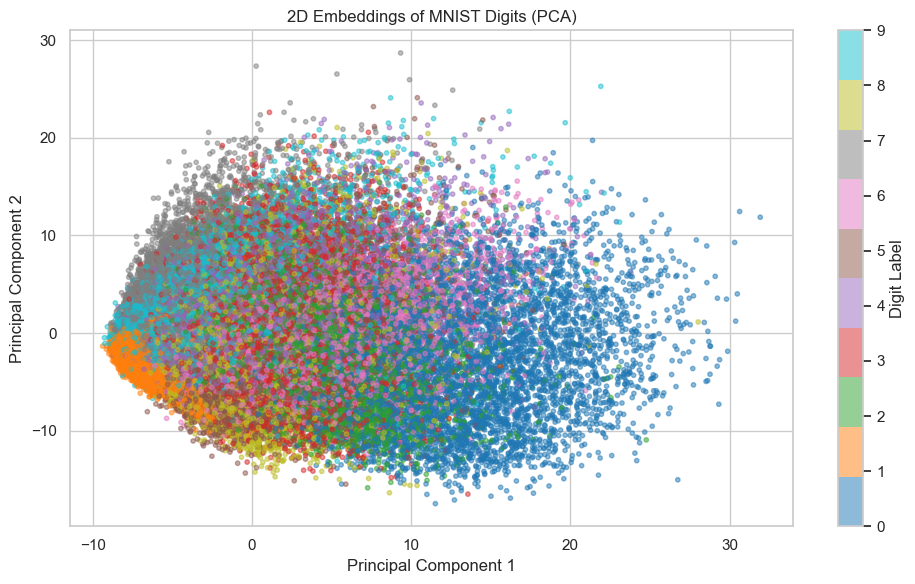

In [1]:
# data-embeddings-visualized.py

# -------------------------------
# IMPORT LIBRARIES
# -------------------------------
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set plot style
sns.set(style='whitegrid', palette='muted')

# -------------------------------
# LOAD MNIST DATASET
# -------------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Original data shape: {X.shape}")  # (70000, 784)

# -------------------------------
# NORMALIZE FEATURES
# -------------------------------
# Pixel values range from 0 to 255, so we scale them
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# REDUCE TO 2D USING PCA
# -------------------------------
print("Reducing dimensionality using PCA...")
pca = PCA(n_components=2)
X_embedded = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

# -------------------------------
# VISUALIZE EMBEDDINGS
# -------------------------------
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap='tab10', alpha=0.5, s=10)
plt.colorbar(scatter, label='Digit Label')
plt.title("2D Embeddings of MNIST Digits (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()
